In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np

#from pandas_datareader import data, wb
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline


# Ativos da Carteira

In [60]:
#tickers = yf.Ticker('^BVSP')
#tickers = yf.Ticker('FB')
#tickers = yf.Ticker('NIO')
tickers = yf.Ticker('AAPL')

In [73]:
#df = tickers.history(interval='1d', start='2018-01-01', end='2021-03-19')
df = tickers.history(interval='1d', start='2018-01-01')

In [74]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-18,122.879997,123.180000,120.320000,120.529999,121229700,0.0,0.0
2021-03-19,119.900002,121.430000,119.680000,119.989998,185023200,0.0,0.0
2021-03-22,120.330002,123.870003,120.260002,123.389999,111912300,0.0,0.0
2021-03-23,123.330002,124.239998,122.139999,122.540001,95195700,0.0,0.0
2021-03-24,122.820000,122.900002,120.309998,120.699997,73786961,0.0,0.0


In [75]:
#Decomposição de uma série temporal
#Modelo Aditivo
#Modelo Multiplicativo
#df.index[0]

In [76]:
#df.index[-1]

In [77]:
decomposicao = seasonal_decompose(df[['Close']], model='aditive', period=30,extrapolate_trend=30)

In [78]:
#O mesmo resultado da serie
#decomposicao.seasonal + decomposicao.resid + decomposicao.trend

In [79]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02    39.801112
2018-01-03    39.846901
2018-01-04    39.892689
2018-01-05    39.938478
2018-01-08    39.984266
Name: trend, dtype: float64

In [80]:
#decomposicao.seasonal

In [81]:
#decomposicao.plot()

In [82]:
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', period=30,extrapolate_trend=30)

In [83]:
#decomposicao_multi.seasonal

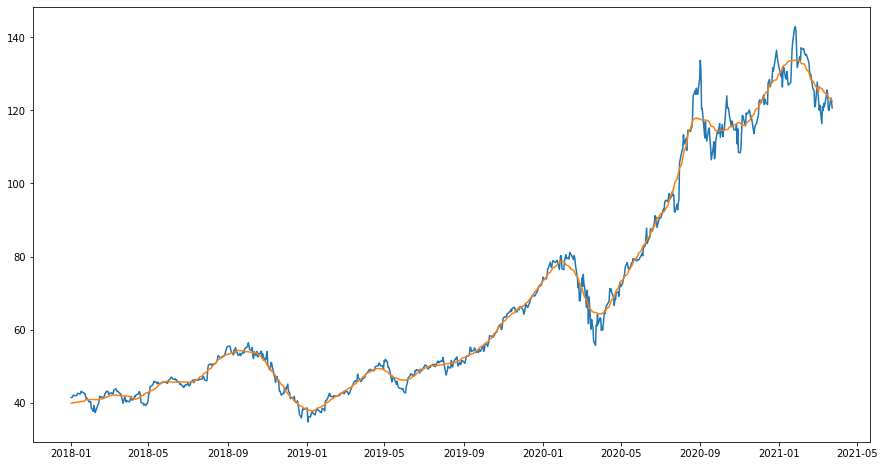

In [84]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

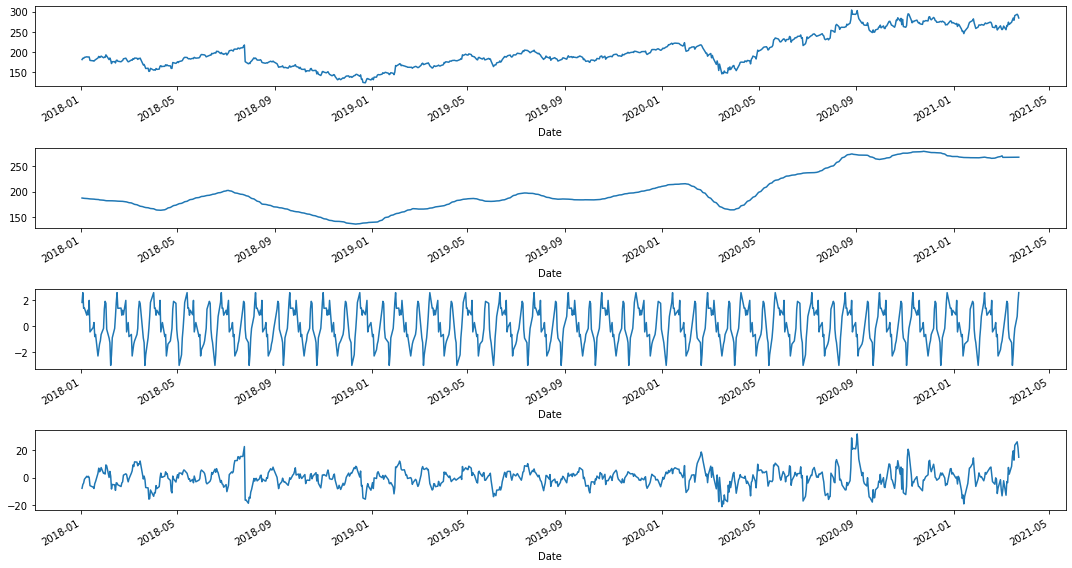

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

In [55]:
df.Dividends.tail()

Date
2021-03-18    0
2021-03-19    0
2021-03-22    0
2021-03-23    0
2021-03-24    0
Name: Dividends, dtype: int64